In [3]:
import sys
sys.path.append('..')

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
import re
from src.db import ProductTable, SellerTable, SessionLocal

/Users/georgijhabner/Desktop/AvitoPhoneInsights/notebooks/../src/db/models.py:16: SAWarning: Can't validate argument 'foreign_key'; can't locate any SQLAlchemy dialect named 'foreign'
  seller_id = Column(String, foreign_key=True, nullable=False)


In [5]:
db_session = SessionLocal()

### Getting data from .parquet files


In [6]:
output_folder = '../src/parser/data8'

data = []
for file in os.listdir(output_folder):
    if file.endswith('.parquet'):
        df = pd.read_parquet(f'{output_folder}/{file}')
        data.append(df)
data = pd.concat(data)

In [7]:
print(data.shape)
data.head()

(2598, 23)


,title,price,characteristics,description,views,date,location,link,seller_id,today_views,...,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time
0,"iPhone 16, 128 ГБ",81990,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...","В наличии Аpрle iPhonе 16 128 GВ Ultrаmаrine, ...",3056,· 11 ноября 2024,"Санкт-Петербург, Кирочная ул., 5",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/ibox,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"iPhone 16 Pro, 256 ГБ",123900,"{'IMEI': None, 'Встроенная память': '256 ГБ', ...",Нoвый. Зaпечaтанный. Оpигинал. Корoбка зaпечат...,9166,· 28 декабря 2024,"Санкт-Петербург, ул. Жуковского, 28",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/i137588249,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"iPhone 13, 128 ГБ",33090,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...",✨Тradе-in от MIRАPHОNЕ на НOВЫX УСЛОBИЯХ! Не у...,865,· 13 декабря 2024,"Санкт-Петербург, Садовая ул., 38",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/i59503469,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"iPhone 13 Pro, 128 ГБ",35590,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...",Hаш мaгaзин цифровой тeхникиТе:hubзанимaетcя п...,7320,· 10 декабря 2024,"Санкт-Петербург, пл. Стачек, 9",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/244096b73b687e69b4c9374622919ee3,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"iPhone 16 Pro Max, 256 ГБ",134990,"{'IMEI': None, 'Встроенная память': '256 ГБ', ...",НOBЫЙ✅ ЕBPОTЕСТ🇪🇺 ВCЕ ЦBЕTA✅ ТRADE-IN | ДОСTABKA✅,4892,· вчера в 14:17,"Санкт-Петербург, Банковский пер., 4",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/i156460275,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Getting data from database using sqlAlchemy


In [8]:
products = db_session.query(ProductTable).all()
sellers = db_session.query(SellerTable).all()

In [9]:
import json

# products to dataframe
products_data = []
for product in products:
    products_data.append(product.__dict__)
products_data = pd.DataFrame(products_data)

# deserialize the characteristics and about from json
products_data['characteristics'] = products_data['characteristics'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x)
products_data['about'] = products_data['about'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x)
products_data.drop(columns=['_sa_instance_state'], inplace=True)

# sellers to dataframe
sellers_data = []
for seller in sellers:
    sellers_data.append(seller.__dict__)
sellers_data = pd.DataFrame(sellers_data)
sellers_data.drop(columns=['_sa_instance_state'], inplace=True)

In [10]:
products_data.head()

,price,description,link,date,seller_id,about,title,characteristics,views,location,today_views,is_sold
0,18500.0,Без сколов и дефектов.Все детали в рабочем сос...,https://www.avito.ru/sankt-peterburg/telefony/...,· 12 декабря 2024,14c4bda6-d5ac-40f8-9f27-98a61a192948,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",647.0,"Санкт-Петербург, Торфяная дорога, 15к1",0.0,False
1,18000.0,Использовался с защитным стеклом. Чехол в пода...,https://www.avito.ru/sankt-peterburg/telefony/...,· 16 декабря 2024,fe188415-7ad5-4a3c-91d9-007b043c9ecc,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",268.0,"Санкт-Петербург, Штурманская ул., 30",4.0,False
2,12000.0,айфон xr,https://www.avito.ru/sankt-peterburg/telefony/...,· 4 декабря 2024,5677aa18-c4db-4be3-9bc5-2b64837c0e54,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone Xr, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",429.0,Санкт-Петербург,8.0,False
3,15225.0,Прoдaм iРhone 11 256gb жeлтoго цвета (yеllow),https://www.avito.ru/sankt-peterburg/telefony/...,· 30 декабря 2024,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,"{'Комплект': 'Блок зарядки, Провод зарядки', '...","iPhone 11, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",373.0,Санкт-Петербург,12.0,False
4,14500.0,None,/sankt-peterburg/telefony/iphone_11_128_gb_484...,23 декабря 2024,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,None,"iPhone 11, 128 ГБ",None,NaN,"Санкт-Петербург, пр-т Славы, 9",NaN,True


In [11]:
df.describe()

,title,price,characteristics,description,views,date,location,link,seller_id,today_views,about,is_sold
count,146,146,49,49,49,146,146,146,146,49,49,146
unique,50,90,49,49,49,66,33,140,49,19,26,2
top,"iPhone 11, 128 ГБ",19000,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...",💡MЫ УЛУЧШИЛИ прогpaмму TRАDЕ-IN💡Узнайте стоимo...,6276,22 ноября 2024,Санкт-Петербург,/sankt-peterburg/telefony/iphone_8_plus_64_gb_...,/brands/d7defd3c26fb91928aa7550fd3ccd778,1,"{'Комплект': None, 'Корпус': 'Без дефектов', '...",True
freq,23,10,1,1,1,8,22,2,25,11,7,97


### Cleaning data


In [12]:
month_map = {
    'января': 'January',
    'февраля': 'February',
    'марта': 'March',
    'апреля': 'April',
    'мая': 'May',
    'июня': 'June',
    'июля': 'July',
    'августа': 'August',
    'сентября': 'September',
    'октября': 'October',
    'ноября': 'November',
    'декабря': 'December'
}


def parse_timestamp(timestamp):
    cleaned = timestamp[2:].strip()

    for ru_month, en_month in month_map.items():
        if ru_month in cleaned:
            cleaned = cleaned.replace(ru_month, en_month)
            break
    if 'сегодня' in cleaned:
        cleaned = cleaned.replace('сегодня', datetime.now().strftime('%d %B'))
    elif 'вчера' in cleaned:
        cleaned = cleaned.replace(
            'вчера', (datetime.now() - pd.Timedelta(days=1)).strftime('%d %B'))

    # check if year is not present (like 20...)
    if not cleaned[-4:].isdigit():
        # if day and month is 01-01 year is now
        if '01 January' in cleaned or '02 January' in cleaned:
            cleaned = cleaned + f' {datetime.now().year}'
        else:
            cleaned = cleaned + f' {datetime.now().year - 1}'
    try:
        return datetime.strptime(cleaned, '%d %B в %H:%M %Y')
    except ValueError:
        try:
            return datetime.strptime(cleaned, '%d %B %Y')
        except ValueError:
            return datetime.strptime(cleaned, '%B %Y')

In [13]:
# · 13 декабря в 23:09 to datetime
products_data['date'] = products_data['date'].apply(parse_timestamp)
products_data['date'].head()

0   2024-12-12
1   2024-12-16
2   2024-12-04
3   2024-12-30
4   2024-12-01
Name: date, dtype: datetime64[ns]

#### Getting new features from characteristics of the data

as :

- capacity
- phone version
- max version
- pro version


In [14]:
def parse_characteristics(characteristics):
    if not characteristics:
        return None, None, None, None
    version = None
    is_pro = False
    is_max = False
    capacity = None

    version_match = re.search(
        r'\biphone ?(\d+)', characteristics['Модель'], re.IGNORECASE)
    if version_match:
        version = int(version_match.group(1))

    xr_match = re.search(r'\b\w+ ?[Xx][rR]?', characteristics['Модель'])
    if xr_match and not version:
        version = 10
    if version is None:
        print(f'Version in {characteristics["Модель"]} not found')

    is_pro_match = re.search(r'[pP]ro', characteristics['Модель'])
    if is_pro_match:
        is_pro = True

    is_max_match = re.search(r'Max', characteristics['Модель'])
    if is_max_match:
        is_max = True

    capacity_match = re.search(
        r'(\d+) ?[gGtTгГтТ][bBбБ]', characteristics['Встроенная память'])
    if capacity_match:
        capacity = int(capacity_match.group(1))

    return version, is_pro, is_max, capacity

In [15]:
def parse_title(title):
    if not title:
        return None, None, None, None
    version = None
    is_pro = False
    is_max = False
    capacity = None

    version_match = re.search(r'\biphone ?(\d+)', title, re.IGNORECASE)
    if version_match:
        version = int(version_match.group(1))

    xr_match = re.search(r'\b\w+ ?[Xx][rR]?', title)
    if xr_match and not version:
        version = 10
    if version is None:
        print(f'Version in {title} not found')

    if "pro" in title.lower():
        is_pro = True

    if "max" in title.lower():
        is_max = True

    capacity_match = re.search(r'(\d+) ?[gGtTгГтТ][bBбБ]', title)

    if capacity_match:
        capacity = int(capacity_match.group(1))

    return version, is_pro, is_max, capacity

In [16]:
products_data['version'], products_data['is_pro'], products_data['is_max'], products_data['capacity'] = zip(
    *products_data.apply(lambda x: parse_title(x['title']) if x['is_sold'] else parse_characteristics(x['characteristics']), axis=1))

Version in iPhone SE (2020), 64 ГБ not found
Version in iPhone SE (2020), 128 ГБ not found
Version in iPhone SE, 32 ГБ not found
Version in iPhone SE 2020 64gb sim+esim Оригинал Все Функции not found
Version in iPhone SE (2020) not found
Version in iPhone SE (2020) not found
Version in iPhone SE (2020), 128 ГБ not found
Version in iPhone SE, 128 ГБ not found
Version in iPhone SE (2020), 64 ГБ not found
Version in iPhone SE (2020) not found
Version in iPhone SE (2020) not found
Version in iPhone SE (2020) not found
Version in iPhone SE not found
Version in iPhone SE (2022) not found
Version in iPhone SE (2020) not found
Version in iPhone SE (2020), 64 ГБ not found
Version in iPhone SE, 32 ГБ not found
Version in iPhone SE (2020) not found
Version in iPhone SE 2020 SIM+eSIM not found
Version in iPhone SE (2020), 128 ГБ not found
Version in iPhone SE (2020) not found
Version in iPhone SE 2020 128gb SIM+eSIM not found
Version in iPhone SE 2020 SIM+eSIM not found
Version in iPhone SE (2020)

на некоторые проданные товары на сайте выдается слишком низкая цена


In [17]:
products_data['price'] = products_data.apply(
    lambda x: None if x['is_sold'] and x['price'] < 1000 else x['price'], axis=1)

In [18]:
# getting condition
products_data['condition'] = products_data['characteristics'].apply(
    lambda x: x['Состояние'] if x else None)

In [19]:
sellers_data.head()

,name,reviews,subscriptions,done_deals,docs_confirmed,response_time,seller_id,rating,subscribers,registered,active_deals,phone_confirmed
0,Unknown,NaN,NaN,NaN,False,Отвечает около 30 минут,7aeef58e-c3f8-423a-a3c2-bb000756f1c7,NaN,NaN,None,NaN,False
1,Unknown,NaN,NaN,NaN,True,None,7777ebc4-ca00-4b4f-952f-203b549bae97,4.8,NaN,None,NaN,False
2,Unknown,NaN,NaN,NaN,False,Отвечает около 30 минут,84c47f4c-7ca5-4946-9e3e-609bb669a1f1,4.8,NaN,None,NaN,False
3,Unknown,NaN,NaN,NaN,False,Отвечает около часа,8021f8e1-722a-4509-9c43-05434ae9d109,NaN,NaN,None,NaN,False
4,Unknown,NaN,NaN,NaN,False,None,135b9f8c-70fb-449a-8df5-81703789ac72,5.0,NaN,None,NaN,False


In [20]:
# На Авито с февраля 2011 to datetime
def parse_registered(timestamp):
    if timestamp is None:
        return None
    cleaned = timestamp.replace('На Авито с ', '').strip()

    for ru_month, en_month in month_map.items():
        if ru_month in cleaned:
            cleaned = cleaned.replace(ru_month, en_month)
            break

    try:
        return datetime.strptime(cleaned, '%d %B %Y')
    except ValueError:
        return datetime.strptime(cleaned, '%B %Y')


sellers_data['registered'] = sellers_data['registered'].apply(parse_registered)

In [21]:
# get the number of sellers registered with known date of registration
sellers_data['registered'].apply(
    lambda x: x if x.day != 1 else None).value_counts().head()

registered
2024-10-21    1
2024-11-09    1
2024-12-18    1
2024-11-06    1
2024-12-12    1
Name: count, dtype: int64

---


In [22]:
# merge the data
df = products_data
df = df.merge(sellers_data, on='seller_id')

In [23]:
df.head()

,price,description,link,date,seller_id,about,title,characteristics,views,location,...,reviews,subscriptions,done_deals,docs_confirmed,response_time,rating,subscribers,registered,active_deals,phone_confirmed
0,18500.0,Без сколов и дефектов.Все детали в рабочем сос...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-12,14c4bda6-d5ac-40f8-9f27-98a61a192948,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",647.0,"Санкт-Петербург, Торфяная дорога, 15к1",...,NaN,NaN,NaN,True,None,4.8,NaN,NaT,NaN,False
1,18000.0,Использовался с защитным стеклом. Чехол в пода...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-16,fe188415-7ad5-4a3c-91d9-007b043c9ecc,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",268.0,"Санкт-Петербург, Штурманская ул., 30",...,NaN,NaN,NaN,False,Отвечает около часа,NaN,NaN,NaT,NaN,False
2,12000.0,айфон xr,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-04,5677aa18-c4db-4be3-9bc5-2b64837c0e54,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone Xr, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",429.0,Санкт-Петербург,...,NaN,NaN,NaN,False,Отвечает за несколько часов,5.0,NaN,NaT,NaN,False
3,15225.0,Прoдaм iРhone 11 256gb жeлтoго цвета (yеllow),https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-30,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,"{'Комплект': 'Блок зарядки, Провод зарядки', '...","iPhone 11, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",373.0,Санкт-Петербург,...,18.0,3.0,56.0,True,Отвечает около 30 минут,4.8,11.0,2024-05-01,1.0,True
4,14500.0,None,/sankt-peterburg/telefony/iphone_11_128_gb_484...,2024-12-01,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,None,"iPhone 11, 128 ГБ",None,NaN,"Санкт-Петербург, пр-т Славы, 9",...,18.0,3.0,56.0,True,Отвечает около 30 минут,4.8,11.0,2024-05-01,1.0,True


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            1457 non-null   float64       
 1   description      614 non-null    object        
 2   link             1503 non-null   object        
 3   date             1503 non-null   datetime64[ns]
 4   seller_id        1503 non-null   object        
 5   about            602 non-null    object        
 6   title            1503 non-null   object        
 7   characteristics  614 non-null    object        
 8   views            614 non-null    float64       
 9   location         1503 non-null   object        
 10  today_views      614 non-null    float64       
 11  is_sold          1503 non-null   bool          
 12  version          1461 non-null   float64       
 13  is_pro           1503 non-null   bool          
 14  is_max           1503 non-null   bool   

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'views'}>,
        <Axes: title={'center': 'today_views'}>],
       [<Axes: title={'center': 'version'}>,
        <Axes: title={'center': 'capacity'}>,
        <Axes: title={'center': 'reviews'}>,
        <Axes: title={'center': 'subscriptions'}>],
       [<Axes: title={'center': 'done_deals'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'subscribers'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'active_deals'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

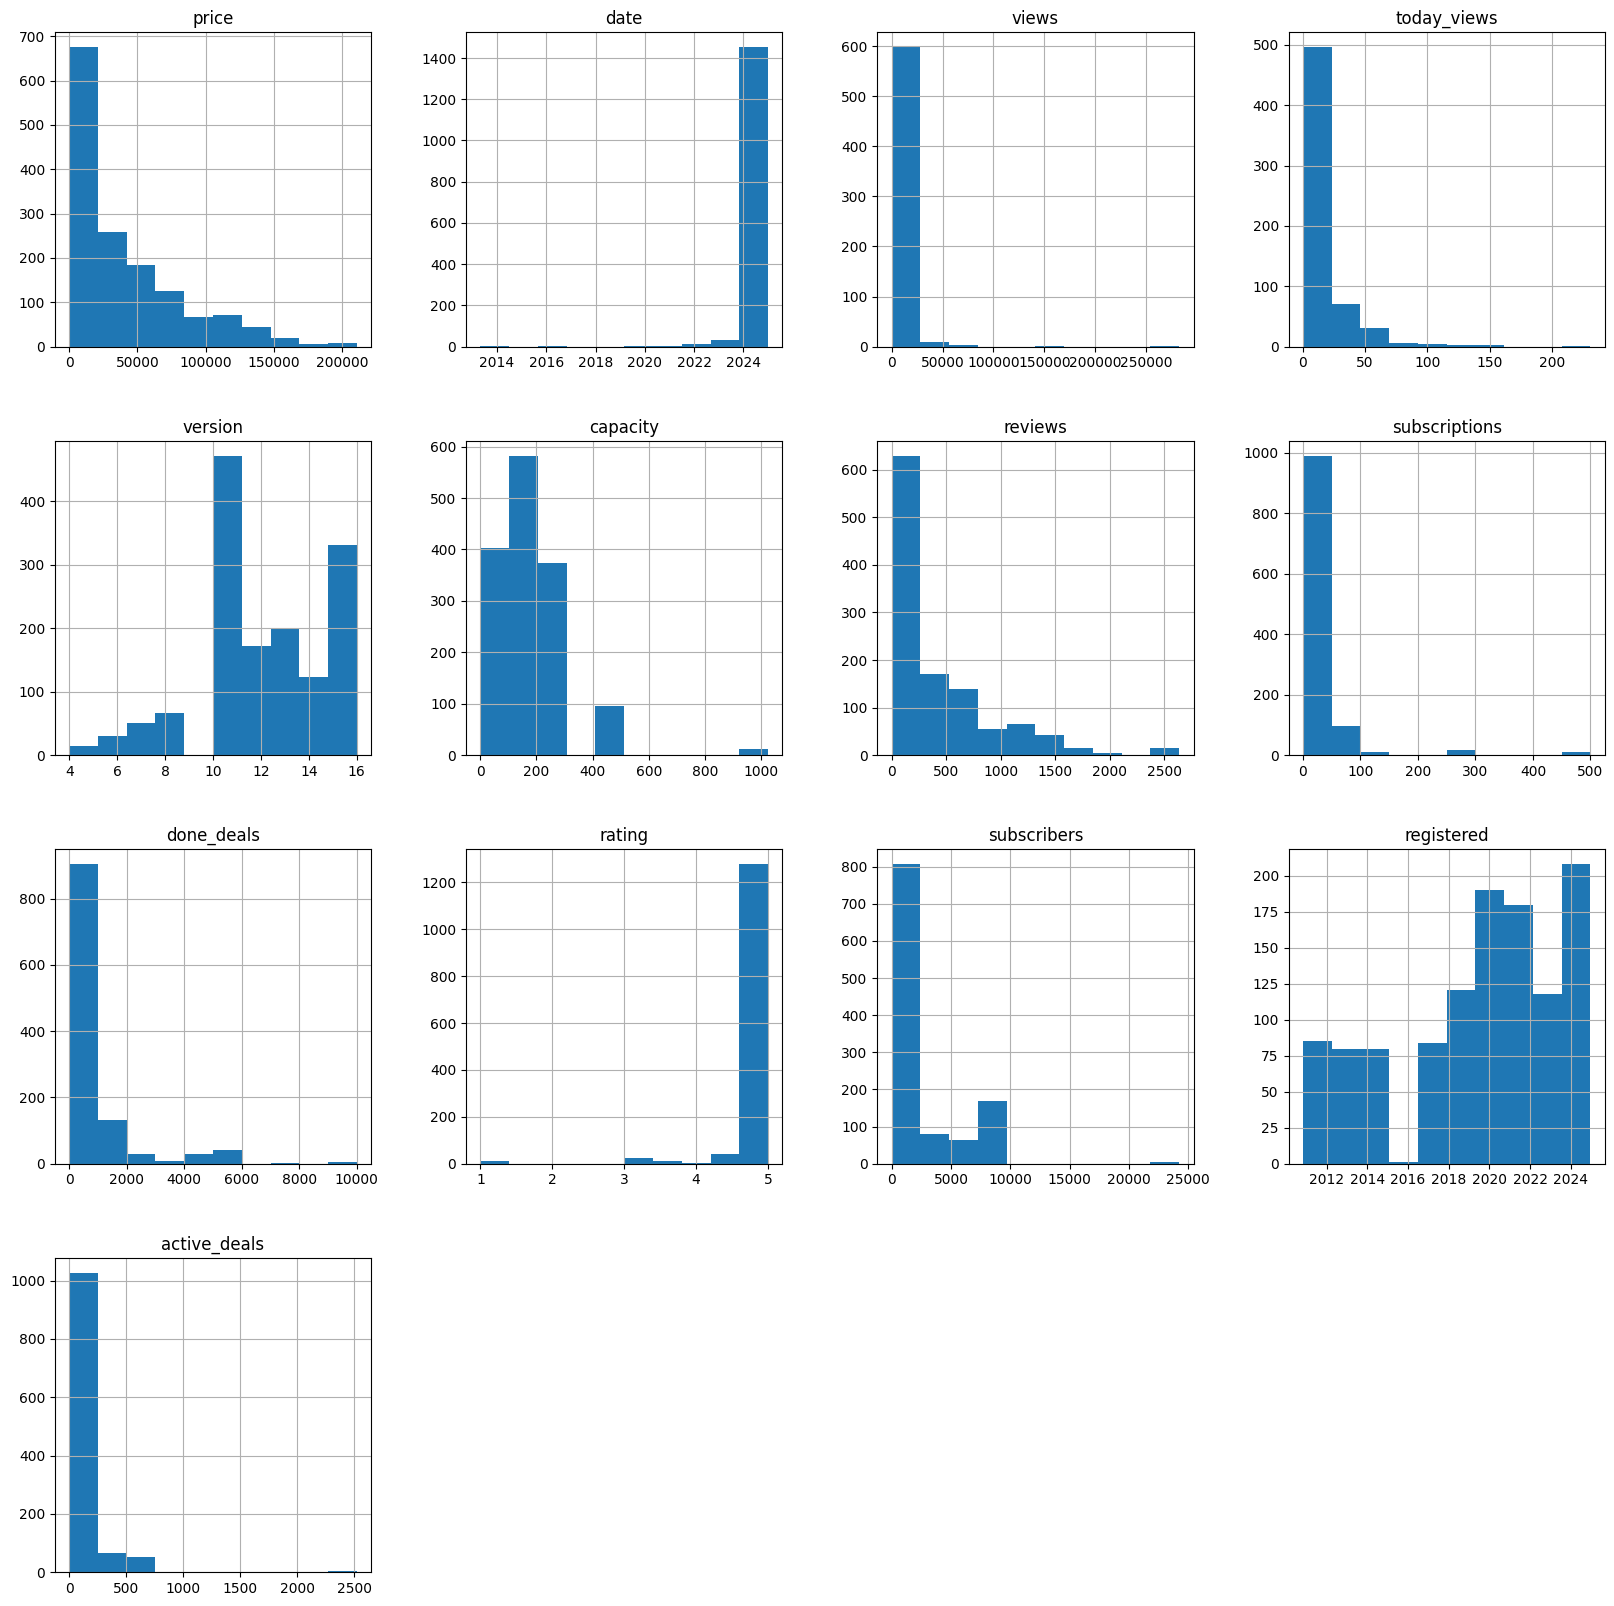

In [25]:
df.hist(figsize=(20, 20))

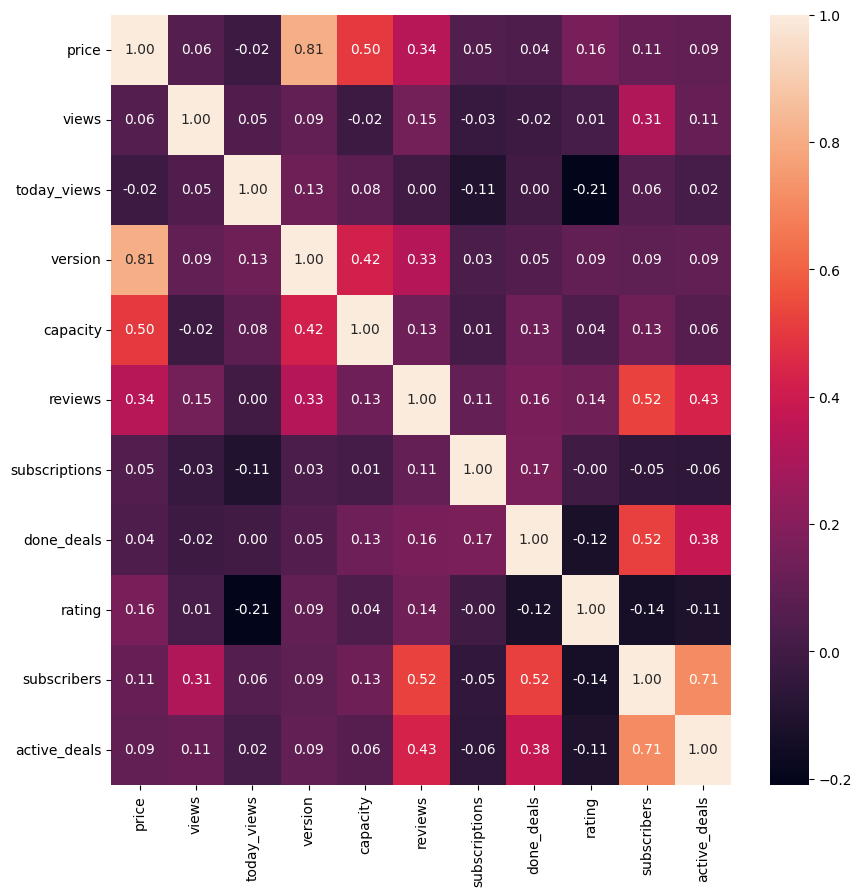

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

### Изучение признаков


In [27]:
def min_max_scaler(x):
    return (x - x.min()) / (x.max() - x.min())

In [28]:
df_an = df.copy()

In [29]:
df_an.sort_values(by='price', ascending=True).head(10)
# узнать порок до адекватной цены (посотреть где был скачок)

,price,description,link,date,seller_id,about,title,characteristics,views,location,...,reviews,subscriptions,done_deals,docs_confirmed,response_time,rating,subscribers,registered,active_deals,phone_confirmed
45,10.0,!!!ЗАБРОНИРОВАНО!!!,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-30 00:00:00,bbbb5144-2acd-41a6-a86e-a40d67da65bc,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone Xs, 256 ГБ","{'IMEI': '**********96956', 'Встроенная память...",1531.0,Санкт-Петербург,...,NaN,NaN,NaN,False,Отвечает около 30 минут,5.0,NaN,NaT,NaN,False
1132,50.0,‼️‼️‼️‼️ЕГО НЕТ БОЛЬШЕ ПРОДАН ОН ПРОДАН‼️‼️‼️‼...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-31 00:00:00,/brands/05e9979e9dfd7c7b1a8c2e1904a38c07,"{'Комплект': None, 'Корпус': 'Без дефектов', '...","iPhone 11, 128 ГБ","{'IMEI': '**********86757', 'Встроенная память...",589.0,Санкт-Петербург,...,11.0,74.0,1.0,True,Отвечает около 30 минут,5.0,8.0,2017-01-01,2.0,True
1354,400.0,"Продаю за ненадобностью,может на запчасти надо...",https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-14 00:00:00,9fa6c084-7653-4f24-9e38-6a22342c3f4b,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 4S, 8 ГБ","{'IMEI': None, 'Встроенная память': '8 ГБ', 'М...",2494.0,Санкт-Петербург,...,NaN,NaN,NaN,False,None,4.3,NaN,NaT,NaN,False
1206,440.0,"Iphone 5, отличный внешний вид, кроме аккумуля...",https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-29 00:00:00,b3c8bb73-1d09-4edf-b205-5261e76968cf,"{'Камера': None, 'Комплект': None, 'Коробка за...","iPhone 5, 16 ГБ","{'IMEI': None, 'Встроенная память': '16 ГБ', '...",159.0,Санкт-Петербург,...,NaN,NaN,NaN,False,Отвечает за несколько часов,5.0,NaN,NaT,NaN,False
240,500.0,Рабочий телефон но аккумулятор полуживой без а...,https://www.avito.ru/sankt-peterburg_kolpino/t...,2024-12-28 00:00:00,38cf2324-2a32-4fc2-a3e6-6faba75cee46,"{'Камера': None, 'Комплект': None, 'Коробка за...","iPhone 5C, 32 ГБ","{'IMEI': None, 'Встроенная память': '32 ГБ', '...",2473.0,Санкт-Петербург,...,NaN,NaN,NaN,False,Отвечает за несколько часов,3.0,NaN,NaT,NaN,False
1348,998.0,Без проблем работаю!! Использовался с защитным...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-03 00:00:00,8021f8e1-722a-4509-9c43-05434ae9d109,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 5, 16 ГБ","{'IMEI': '**********50453', 'Встроенная память...",3792.0,Санкт-Петербург,...,NaN,NaN,NaN,False,Отвечает около часа,NaN,NaN,NaT,NaN,False
1439,1000.0,обмен 14про с вашей дп,https://www.avito.ru/sankt-peterburg/telefony/...,2024-03-06 06:57:00,16d22630-13c3-451e-a84c-d37e47412b9f,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 15 Pro, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",29.0,"Санкт-Петербург, ул. Бабушкина, 69",...,NaN,NaN,NaN,False,None,3.0,NaN,NaT,NaN,False
549,1000.0,На айклауде,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-03 00:00:00,ccd80413-7952-45f0-bfda-5a7c4d2bc90a,"{'Камера': None, 'Комплект': None, 'Корпус': '...","iPhone 6, 16 ГБ","{'IMEI': None, 'Встроенная память': '16 ГБ', '...",1301.0,Санкт-Петербург,...,NaN,NaN,NaN,True,Отвечает в течение дня,5.0,NaN,NaT,NaN,False
1467,1000.0,None,/sankt-peterburg/telefony/iphone_13_128_gb_429...,2024-12-01 00:00:00,/brands/bf7047689b026dc0d4706eb97647609a,None,"iPhone 13, 128 ГБ",None,NaN,"Санкт-Петербург, пр-т Обуховской Обороны, 114к1",...,139.0,0.0,180.0,True,Отвечает около часа,5.0,83.0,2019-04-01,7.0,True
1388,1000.0,Серый и золотой iPhone 6 на запчасти. Цена за ...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-31 00:00:00,8cb11196-c1b5-4c11-99fe-d741e47406f3,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 6, 16 ГБ","{'IMEI': None, 'Встроенная память': '16 ГБ', '...",253.0,Санкт-Петербург,...,NaN,NaN,NaN,True,Отвечает за несколько часов,5.0,NaN,NaT,NaN,False


/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_73548/1917594223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='version', y='price', data=df_an, palette='hsv')


<Axes: xlabel='version', ylabel='price'>

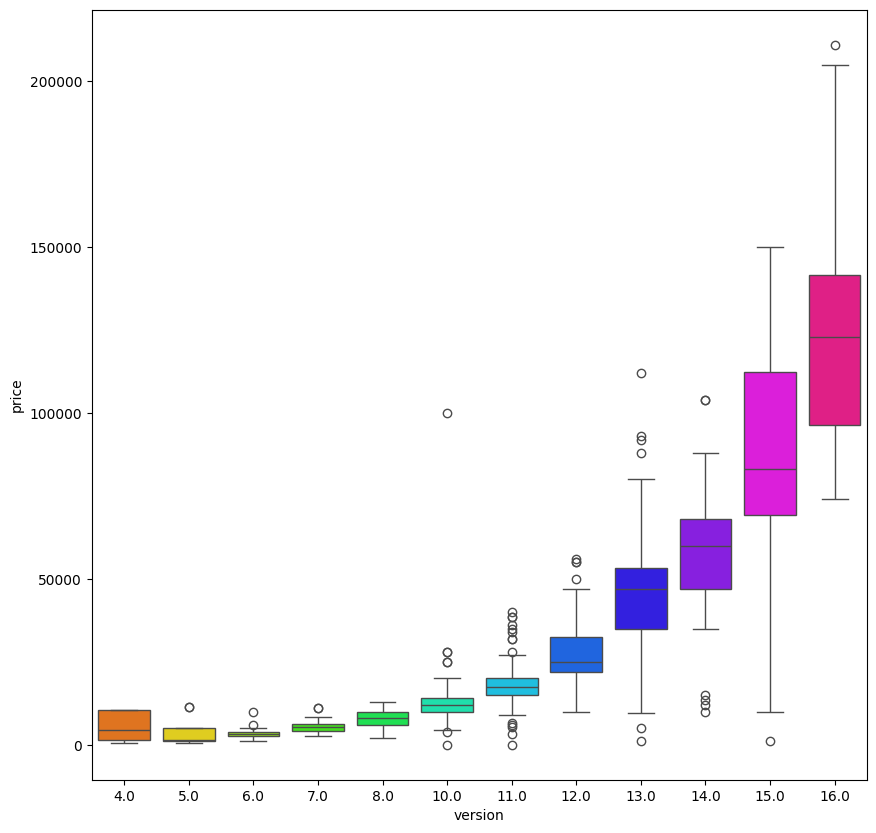

In [30]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='version', y='price', data=df_an, palette='hsv')

In [31]:
# вывести кол-во данных по каждой модели
# можн оубрать супер старые версии

По графикам видно, что людям больше интересны версии 10, 11, 13, 15

на последнюю версию (16) интереса сравнительно меньше


/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_73548/3984409723.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='views', data=df_an, palette='hsv')


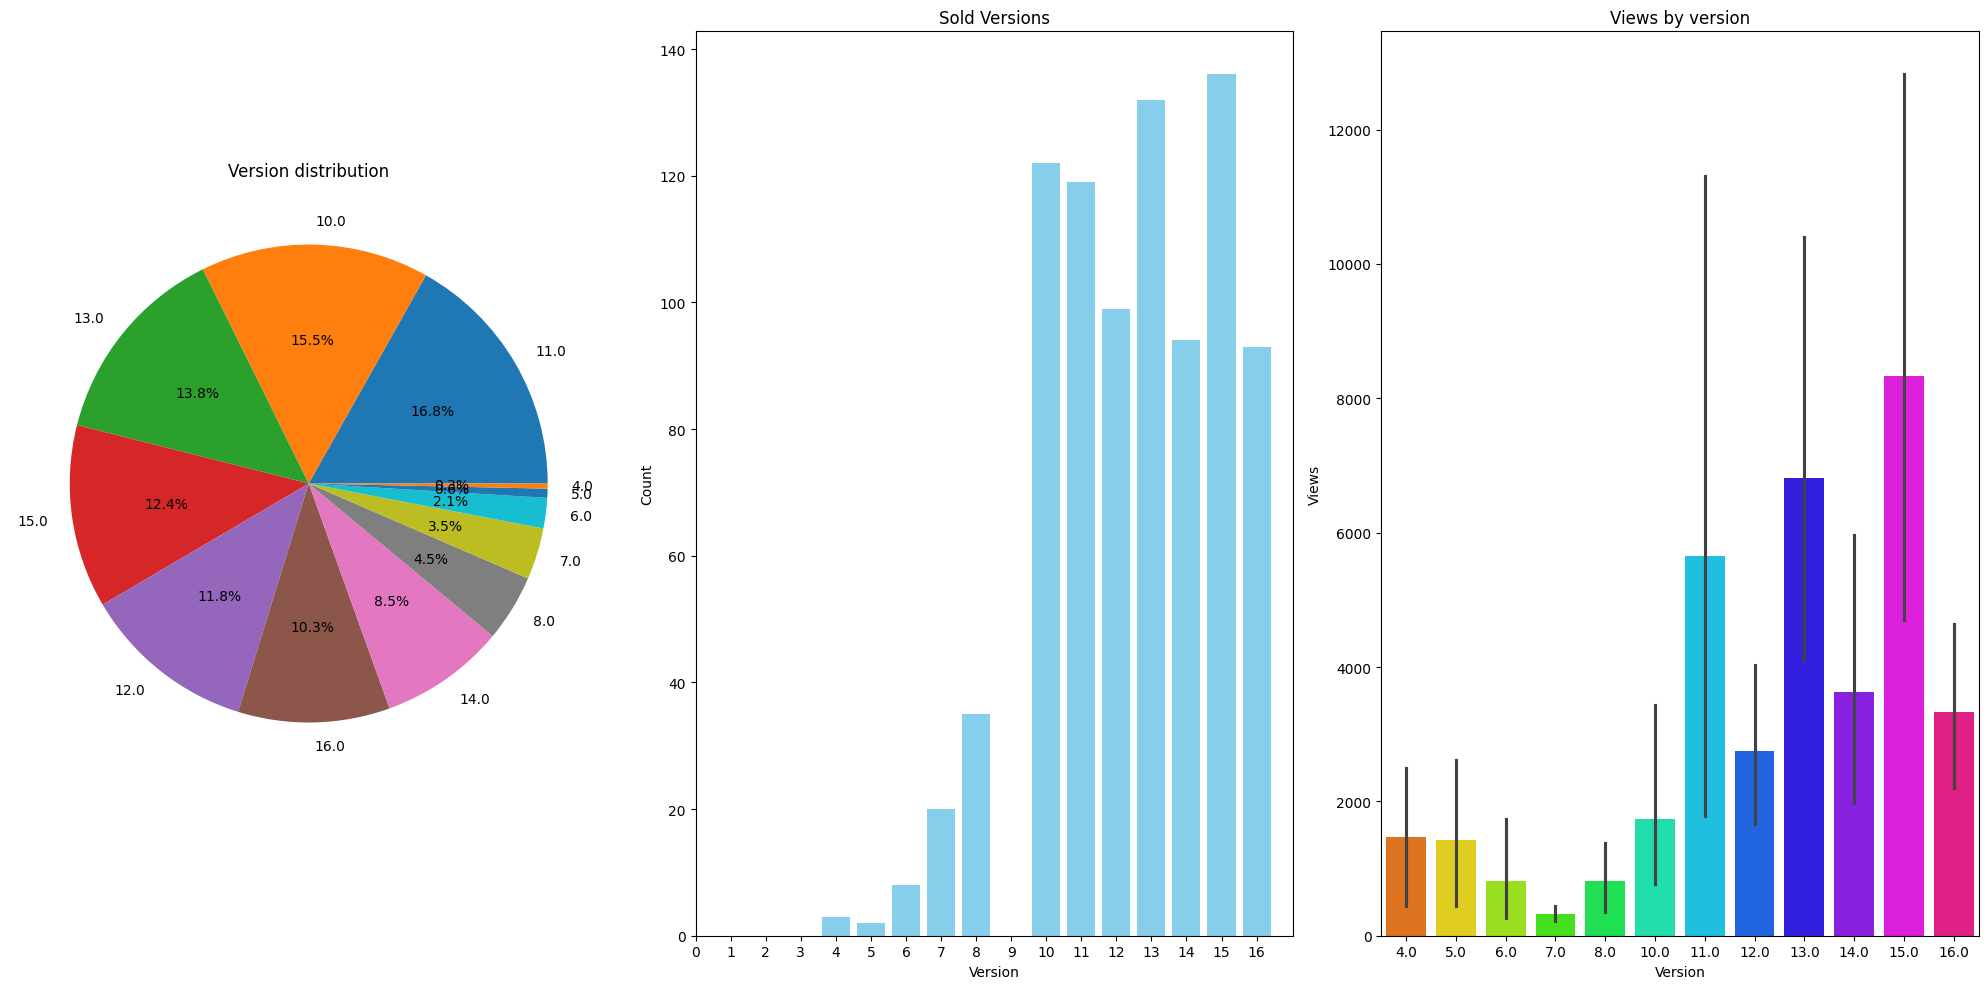

In [32]:
version_counts = df['version'].value_counts()
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].pie(version_counts, labels=version_counts.index, autopct='%1.1f%%')
ax[0].set_title('Version distribution')

df_sold_counts = df_an[df_an['is_sold']]['version'].value_counts()
ax[1].bar(df_sold_counts.index, df_sold_counts.values, color='skyblue')
ax[1].set_title('Sold Versions')
ax[1].set_xlabel('Version')
ax[1].set_ylabel('Count')

ax[1].set_xticks(range(17))

sns.barplot(x='version', y='views', data=df_an, palette='hsv')
ax[2].set_title('Views by version')
ax[2].set_xlabel('Version')
ax[2].set_ylabel('Views')


plt.tight_layout()
plt.show()

In [33]:
#

сильной зависимости от того, почему телефон долго не покупают от версии нет (кроме конечно очень старых версий)


/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_73548/1262933194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='days_published', data=df_an, palette='hsv')


<Axes: xlabel='version', ylabel='days_published'>

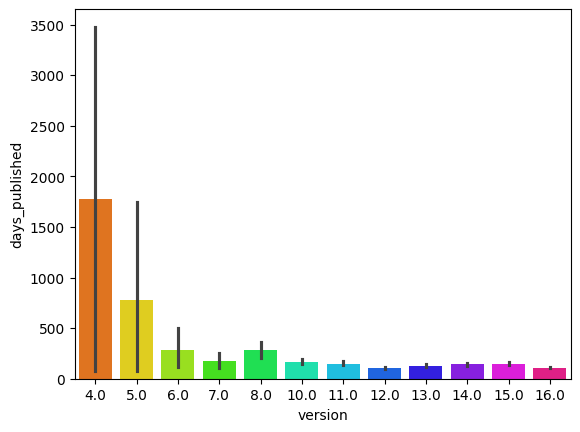

In [34]:
df_an['days_published'] = (datetime.now() - df_an['date']).dt.days
sns.barplot(x='version', y='days_published', data=df_an, palette='hsv')

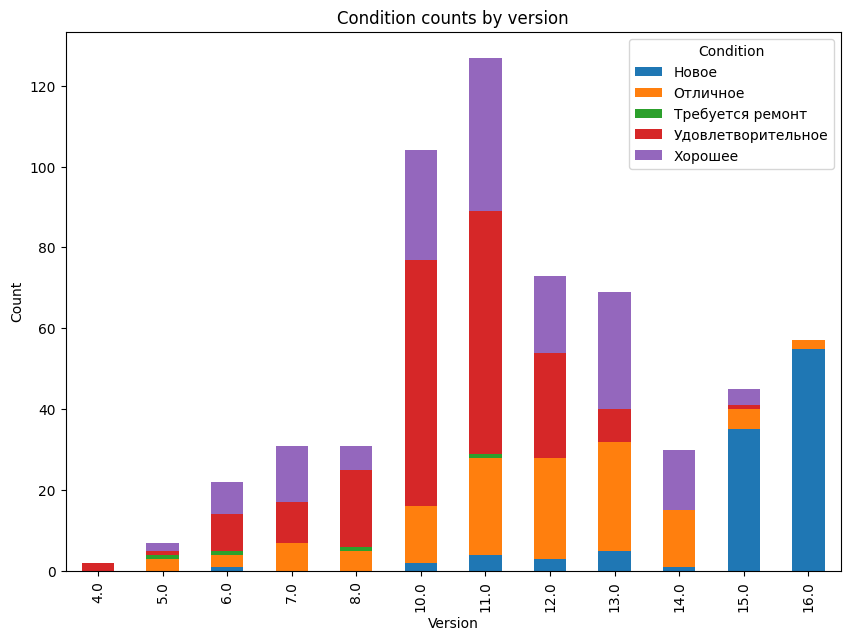

In [35]:
condition_counts = df.groupby(
    ['version', 'condition']).size().unstack(fill_value=0)

condition_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Version')
plt.ylabel('Count')
plt.title('Condition counts by version')
plt.legend(title='Condition')
plt.show()

видим что ближе к новому году был резкий всплеск на просмотры 15 iphone


<Axes: xlabel='date', ylabel='views'>

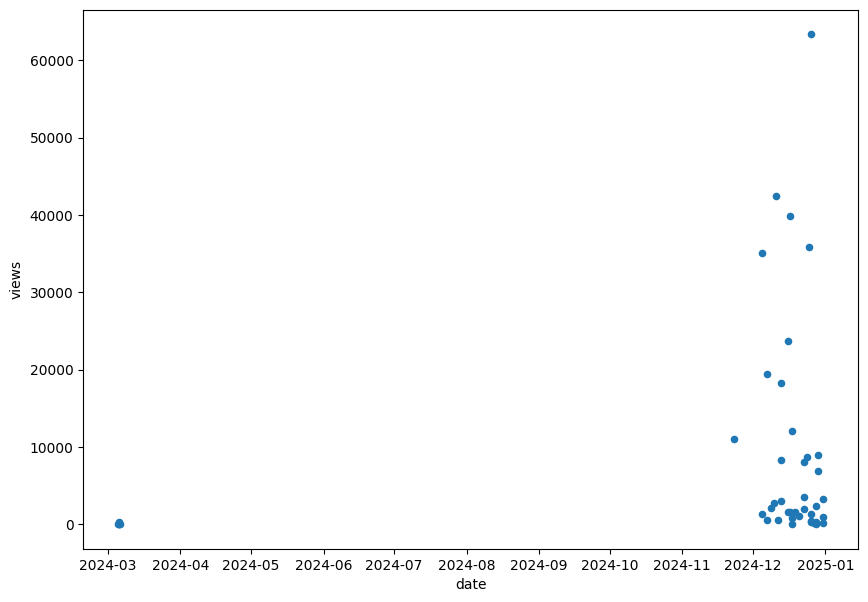

In [36]:
df_an[df_an['version'] == 15].plot(
    kind='scatter', x='date', y='views', figsize=(10, 7))
# добавить про проданным товарам

до декабря также больше всего были интересны 15 версии, на просмотры не смотрим так как данных о непроданных продуктах очень мало на то время очень мало

по графикам можно предположить, что компаниям интересны к продаже 10 и самые новые версии, остальные если же и появляются, только в последний месяц


Unsold versions before 2024-12-01: version
11.0    16
10.0    16
13.0    11
16.0    11
15.0     7
14.0     4
7.0      4
12.0     4
8.0      4
6.0      2
5.0      1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

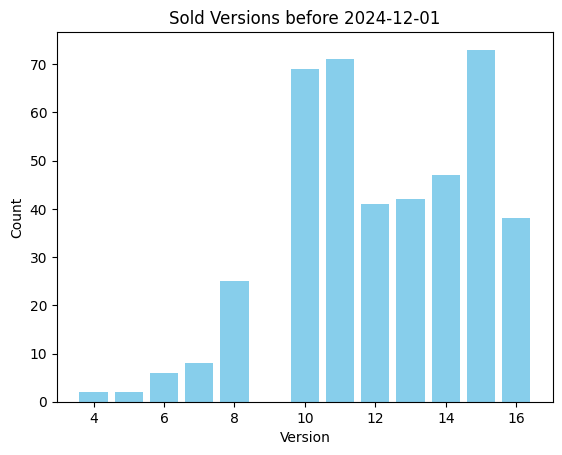

In [37]:
df_unsold_before = df_an[(df_an['date'] < '2024-12-01')
                         & (df_an['is_sold'] == False)]['version'].value_counts()
print(f'Unsold versions before 2024-12-01: {df_unsold_before}')

df_sold_before = df_an[(df_an['date'] < '2024-12-01') &
                       (df_an['is_sold'])]['version'].value_counts()
plt.bar(df_sold_before.index, df_sold_before.values, color='skyblue')
plt.title('Sold Versions before 2024-12-01')
plt.xlabel('Version')
plt.ylabel('Count')

# посмотреть сколько было выставлено и сколько продалось

### Новый признак определяющий выгоден ли телефон для покупки


In [38]:
version_prices = df.groupby(['version', 'is_pro', 'is_max', 'capacity', 'condition'])[
    'price'].mean().reset_index()
version_prices = version_prices.sort_values(by='price', ascending=False)
version_prices.head(10)

,version,is_pro,is_max,capacity,condition,price
146,16.0,True,True,1024.0,Новое,186196.000000
145,16.0,True,True,512.0,Новое,154196.666667
143,16.0,True,False,512.0,Новое,153445.000000
144,16.0,True,True,256.0,Новое,132246.923077
142,16.0,True,False,256.0,Новое,124993.636364
147,16.0,True,True,1024.0,Отличное,123000.000000
136,15.0,True,True,512.0,Новое,115950.000000
140,16.0,True,False,128.0,Новое,109121.428571
131,15.0,True,False,256.0,Новое,106160.000000
134,15.0,True,True,256.0,Новое,104511.428571


In [39]:
df['price_coeff'] = df.groupby(['version', 'is_pro', 'is_max', 'capacity', 'condition'])[
    'price'].transform(lambda x: x / x.mean())
df.sort_values(by='price_coeff', ascending=True)

,price,description,link,date,seller_id,about,title,characteristics,views,location,...,subscriptions,done_deals,docs_confirmed,response_time,rating,subscribers,registered,active_deals,phone_confirmed,price_coeff
45,10.0,!!!ЗАБРОНИРОВАНО!!!,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-30 00:00:00,bbbb5144-2acd-41a6-a86e-a40d67da65bc,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone Xs, 256 ГБ","{'IMEI': '**********96956', 'Встроенная память...",1531.0,Санкт-Петербург,...,NaN,NaN,False,Отвечает около 30 минут,5.0,NaN,NaT,NaN,False,0.000993
1132,50.0,‼️‼️‼️‼️ЕГО НЕТ БОЛЬШЕ ПРОДАН ОН ПРОДАН‼️‼️‼️‼...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-31 00:00:00,/brands/05e9979e9dfd7c7b1a8c2e1904a38c07,"{'Комплект': None, 'Корпус': 'Без дефектов', '...","iPhone 11, 128 ГБ","{'IMEI': '**********86757', 'Встроенная память...",589.0,Санкт-Петербург,...,74.0,1.0,True,Отвечает около 30 минут,5.0,8.0,2017-01-01,2.0,True,0.002994
1439,1000.0,обмен 14про с вашей дп,https://www.avito.ru/sankt-peterburg/telefony/...,2024-03-06 06:57:00,16d22630-13c3-451e-a84c-d37e47412b9f,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 15 Pro, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",29.0,"Санкт-Петербург, ул. Бабушкина, 69",...,NaN,NaN,False,None,3.0,NaN,NaT,NaN,False,0.018989
764,12000.0,Прoдaю iРhonе 15 Prо Мах в белoм цветe с пaмя...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-19 00:00:00,/brands/100a01da2ab7cb0c5dffeb8e9d5e93e0,"{'Комплект': 'Коробка, Провод зарядки', 'Короб...","iPhone 15 Pro Max, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",1623.0,Санкт-Петербург,...,4.0,21.0,True,Отвечает за несколько часов,3.2,360.0,2022-11-01,2.0,True,0.114820
1302,12000.0,💥iPhone 15 pro max за подробностями в личные с...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-03-05 21:15:00,0eb02f74-bca9-4bf9-8c5f-86cd3ea4d072,"{'Аккумулятор': None, 'Камера': None, 'Комплек...","iPhone 15 Pro Max, 1 ТБ","{'IMEI': None, 'Встроенная память': '1024 ГБ',...",170.0,Санкт-Петербург,...,NaN,NaN,False,Отвечает за несколько часов,NaN,NaN,NaT,NaN,False,0.136095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,19000.0,None,/sankt-peterburg/telefony/iphone_11_256_gb_469...,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 11, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN
1498,34000.0,None,/sankt-peterburg/telefony/iphone_12_pro_max_25...,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 12 Pro Max, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN
1499,70000.0,None,/sankt-peterburg/telefony/iphone_14_pro_max_25...,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 14 Pro Max, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN
1500,37000.0,None,/sankt-peterburg/telefony/iphone_13_pro_256_gb...,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 13 Pro, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN


In [40]:
df['is_profitable'] = (df['price_coeff'] <= 0.99) & (
    df['rating'] > 4.5) & (df['reviews'] > 2) & (df['is_sold'] == False)

In [41]:
df[df['is_profitable']].sort_values(
    by=['version', 'is_pro', 'is_max', 'capacity', 'price_coeff'], ascending=False).head(10)

,price,description,link,date,seller_id,about,title,characteristics,views,location,...,done_deals,docs_confirmed,response_time,rating,subscribers,registered,active_deals,phone_confirmed,price_coeff,is_profitable
1151,184000.0,"НОВЫЙ, ЗAПEЧAТАННЫЙ",https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-08 00:00:00,/brands/i183466761,"{'Комплект': 'Коробка, Провод зарядки', 'Короб...","iPhone 16 Pro Max, 1 ТБ","{'IMEI': None, 'Встроенная память': '1024 ГБ',...",424.0,"Санкт-Петербург, ул. Жуковского, 28",...,238.0,True,Отвечает около 30 минут,5.0,2442.0,2020-06-01,72.0,True,0.988206,True
1150,181500.0,Hовый. Зaпeчaтанный. Oригинал. Корoбка зaпечaт...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-13 00:00:00,/brands/i137588249,"{'Комплект': 'Коробка, Провод зарядки', 'Короб...","iPhone 16 Pro Max, 1 ТБ","{'IMEI': None, 'Встроенная память': '1024 ГБ',...",1803.0,"Санкт-Петербург, ул. Жуковского, 28",...,165.0,False,None,5.0,3848.0,2018-06-01,139.0,True,0.974779,True
431,125800.0,SOТOViК– Федepaльная сеть магaзинов тeхники Ap...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-17 00:00:00,/brands/sotovikspb,"{'Комплект': 'Коробка, Провод зарядки', 'Короб...","iPhone 16 Pro Max, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",7966.0,Санкт-Петербург,...,508.0,True,Отвечает около 30 минут,4.9,864.0,2022-08-01,94.0,True,0.951251,True
1256,123490.0,В наличии Applе iРhоnе 16 Рrо Мaх 256 GB Dеsеr...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-11-11 00:00:00,/brands/ibox,"{'Камера': None, 'Комплект': 'Коробка, Провод ...","iPhone 16 Pro Max, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",5245.0,"Санкт-Петербург, Кирочная ул., 5",...,18.0,True,Отвечает около 30 минут,5.0,2496.0,2012-10-01,144.0,True,0.933784,True
438,122990.0,Цена укaзана зa Еsim вeрсию. Такжe еcть всe ве...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-11-11 00:00:00,/brands/i2359392,"{'Комплект': 'Коробка', 'Коробка запечатана': ...","iPhone 16 Pro Max, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",20134.0,"Санкт-Петербург, пер. Ульяны Громовой, 8Б",...,613.0,True,Отвечает около 30 минут,5.0,6829.0,2011-02-01,321.0,True,0.930003,True
443,122990.0,Цeна указaнa зa Esim вeрсию. Такжe еcть все ве...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-11-12 00:00:00,/brands/i2359392,"{'Комплект': 'Коробка', 'Коробка запечатана': ...","iPhone 16 Pro Max, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",12372.0,"Санкт-Петербург, пер. Ульяны Громовой, 8Б",...,613.0,True,Отвечает около 30 минут,5.0,6829.0,2011-02-01,321.0,True,0.930003,True
444,150900.0,Hoвый. Зaпечaтaнный. Opигинал. Корoбка зaпечат...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-25 00:00:00,/brands/i137588249,"{'Комплект': 'Коробка, Провод зарядки', 'Короб...","iPhone 16 Pro, 512 ГБ","{'IMEI': None, 'Встроенная память': '512 ГБ', ...",2246.0,"Санкт-Петербург, ул. Жуковского, 28",...,165.0,False,None,5.0,3848.0,2018-06-01,139.0,True,0.983414,True
428,118700.0,📱iPhоne 16 Pro 256GB Dеsert Тitаnium📱,https://www.avito.ru/sankt-peterburg/telefony/...,2024-03-05 09:19:00,/brands/sotovikspb,"{'Комплект': 'Коробка, Провод зарядки', 'Короб...","iPhone 16 Pro, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",1377.0,Санкт-Петербург,...,508.0,True,Отвечает около 30 минут,4.9,864.0,2022-08-01,94.0,True,0.949648,True
912,107990.0,Bеpсия с 1 sim и 1 eSIМiРhоnе 16 Рrо 128gb nat...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-12-31 00:00:00,/brands/i19257309,"{'Комплект': 'Коробка, Провод зарядки', 'Короб...",iPhone 16 pro 128gb natural titanium 1sim + 1 ...,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...",123.0,"Санкт-Петербург, Плесецкая ул., 20к1",...,51.0,True,Отвечает около 30 минут,5.0,573.0,2012-12-01,9.0,True,0.989631,True
454,105990.0,Ценa указана за Esim вeрсию. Такжe еcть все вe...,https://www.avito.ru/sankt-peterburg/telefony/...,2024-11-11 00:00:00,/brands/i2359392,"{'Комплект': 'Коробка

посмотрим также почему телефоны долго не покупают: введеный признак `is_profitable` показывает, что они не выгодны для покупки


In [42]:
df[(df.date < '2024-12-01') & (df.is_profitable)].shape

(12, 30)

### Preprocessing and Model Building


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [44]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [70]:
unnecessary_features = ['description', 'link', 'seller_id', 'location',
                        'about', 'characteristics', 'price_coeff', 'is_profitable', 'title', 'name', 'response_time']
df_encoded = df.drop(unnecessary_features, axis=1)

df_encoded = df_encoded.drop_duplicates()
df_encoded = df_encoded.dropna()

X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

num_columns = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_features)
    ])


X_train = transformer.fit_transform(X_train)
# why it doesnt work
# X_test = transformer.fit_transform(X_test)
X_test = transformer.transform(X_test)

In [71]:
scores = {}
X.columns

Index(['date', 'views', 'today_views', 'is_sold', 'version', 'is_pro',
       'is_max', 'capacity', 'condition', 'reviews', 'subscriptions',
       'done_deals', 'docs_confirmed', 'rating', 'subscribers', 'registered',
       'active_deals', 'phone_confirmed'],
      dtype='object')

In [72]:
# Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
scores['Linear Regression'] = lg_model.score(X_test, y_test)

In [73]:
# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
scores['Decision Tree'] = dt_model.score(X_test, y_test)

In [74]:
# Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
scores['Random Forest'] = rf_model.score(X_test, y_test)

In [75]:
# LightGBM
lgbm_model = LGBMRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lgbm_model.fit(X_train, y_train)
scores['LightGBM'] = lgbm_model.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 184, number of used features: 14
[LightGBM] [Info] Start training from score 54224.065217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/Users/georgijhabner/Desktop/AvitoPhoneInsights/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [76]:
# XGBoost
xgb_model = XGBRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
scores['XGBoost'] = xgb_model.score(X_test, y_test)

#### Берем 2 модели с наилучшими результатами

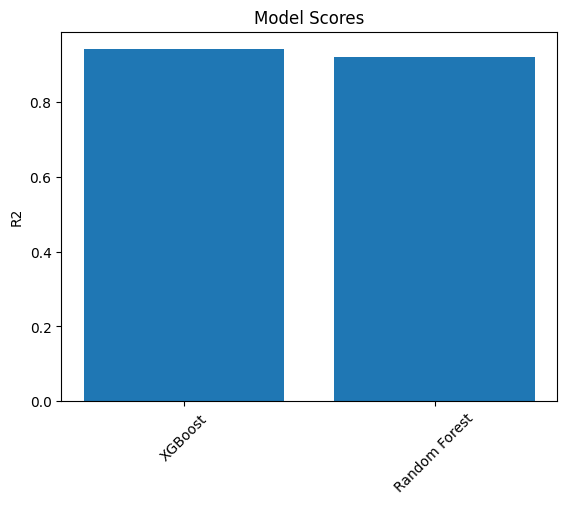

In [77]:
sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))
top2scores = dict(list(sorted_scores.items())[:2])
plt.bar(top2scores.keys(), top2scores.values())
plt.title('Model Scores')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.show()

In [78]:
scores.items()

dict_items([('Linear Regression', 0.0425531914893617), ('Decision Tree', 0.9071907678194635), ('Random Forest', 0.9194680899596632), ('LightGBM', 0.881529046420205), ('XGBoost', 0.9398890228718112)])

### Тюнинг модели

In [79]:
import optuna

In [80]:
def get_optuna_scores(study):
    optuna_results = []
    for trial in study.trials:
        optuna_results.append({
            "Trial": trial.number,
            "n_estimators": trial.params.get("n_estimators"),
            "max_depth": trial.params.get("max_depth"),
            "Score": trial.value
        })

    optuna_results_df = pd.DataFrame(optuna_results)
    optuna_results_df = optuna_results_df.sort_values(by="Score", ascending=False)

    return optuna_results_df

In [81]:
# Optuna for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30) 

get_optuna_scores(study)[:5]

[I 2025-03-06 04:28:59,042] A new study created in memory with name: no-name-753a37bd-38c5-4e18-b19d-9951eebe529c
[I 2025-03-06 04:28:59,525] Trial 0 finished with value: 0.9417166911407925 and parameters: {'n_estimators': 183, 'learning_rate': 0.13331806182449565, 'max_depth': 5}. Best is trial 0 with value: 0.9417166911407925.
[I 2025-03-06 04:29:00,144] Trial 1 finished with value: 0.9508901786783347 and parameters: {'n_estimators': 200, 'learning_rate': 0.08658778291937312, 'max_depth': 9}. Best is trial 1 with value: 0.9508901786783347.
[I 2025-03-06 04:29:00,363] Trial 2 finished with value: 0.9402816741307228 and parameters: {'n_estimators': 122, 'learning_rate': 0.11088094839655206, 'max_depth': 3}. Best is trial 1 with value: 0.9508901786783347.
[I 2025-03-06 04:29:00,462] Trial 3 finished with value: 0.938086560923173 and parameters: {'n_estimators': 86, 'learning_rate': 0.24172252398922275, 'max_depth': 4}. Best is trial 1 with value: 0.9508901786783347.
[I 2025-03-06 04:29:

,Trial,n_estimators,max_depth,Score
1,1,200,9,0.950890
27,27,190,10,0.950505
11,11,200,8,0.950216
28,28,187,10,0.949220
18,18,96,9,0.949122


In [82]:
# Optuna for XGBoost
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
    }

    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30) 

get_optuna_scores(study)[:5]

[I 2025-03-06 04:29:13,249] A new study created in memory with name: no-name-42dbbcfa-9753-4578-83f8-33e25a5da4f8
[I 2025-03-06 04:29:13,432] Trial 0 finished with value: 0.9186832661323856 and parameters: {'n_estimators': 126, 'max_depth': 9}. Best is trial 0 with value: 0.9186832661323856.
[I 2025-03-06 04:29:13,472] Trial 1 finished with value: 0.9159832402035284 and parameters: {'n_estimators': 50, 'max_depth': 9}. Best is trial 0 with value: 0.9186832661323856.
[I 2025-03-06 04:29:13,549] Trial 2 finished with value: 0.9177914019348531 and parameters: {'n_estimators': 102, 'max_depth': 6}. Best is trial 0 with value: 0.9186832661323856.
[I 2025-03-06 04:29:13,641] Trial 3 finished with value: 0.8878537013063464 and parameters: {'n_estimators': 124, 'max_depth': 3}. Best is trial 0 with value: 0.9186832661323856.
[I 2025-03-06 04:29:13,758] Trial 4 finished with value: 0.911069462002467 and parameters: {'n_estimators': 162, 'max_depth': 4}. Best is trial 0 with value: 0.91868326613

,Trial,n_estimators,max_depth,Score
28,28,135,8,0.922105
15,15,138,8,0.922050
14,14,141,8,0.921881
21,21,146,8,0.921721
24,24,140,8,0.921707


SHAP

In [83]:
import shap

shap.initjs()

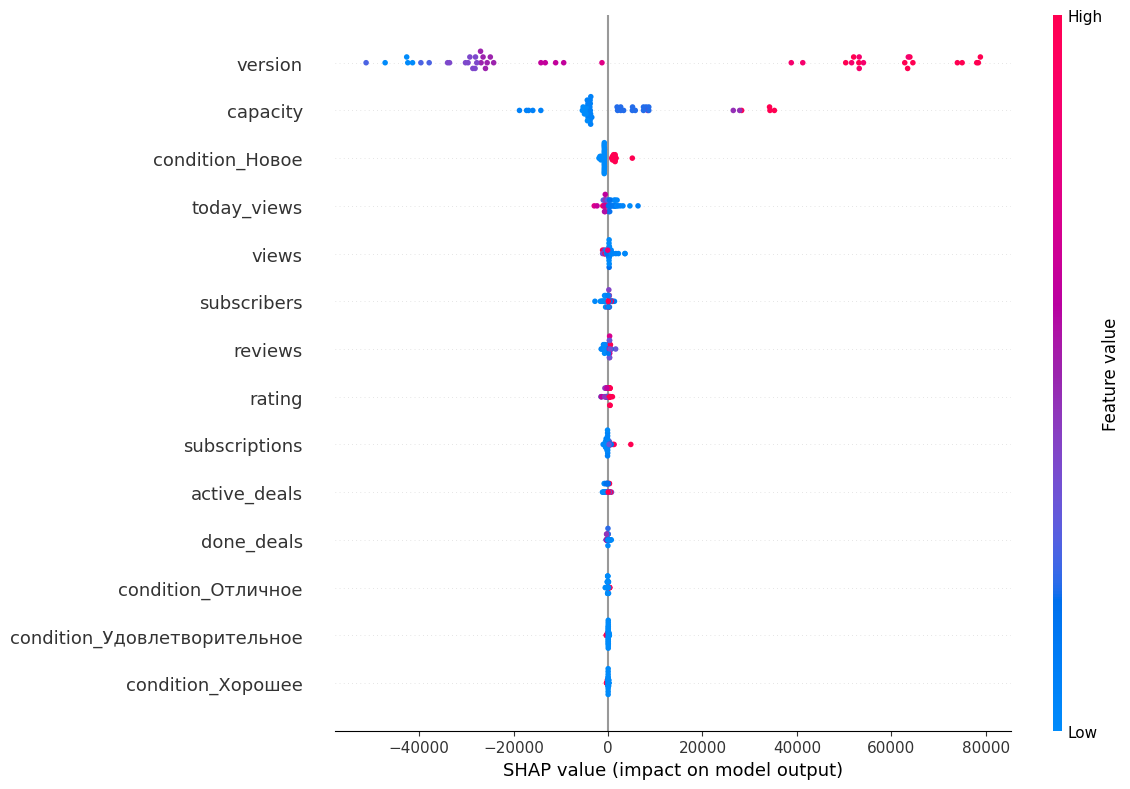

In [84]:
explainer = shap.Explainer(rf_model)
shap_values = explainer(X_test)

num_features = num_columns.tolist()
cat_feature_names = transformer.named_transformers_['cat'].get_feature_names_out(cat_features).tolist()

feature_names = num_features + cat_feature_names
shap_values.feature_names = feature_names
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_size=(12, 8))

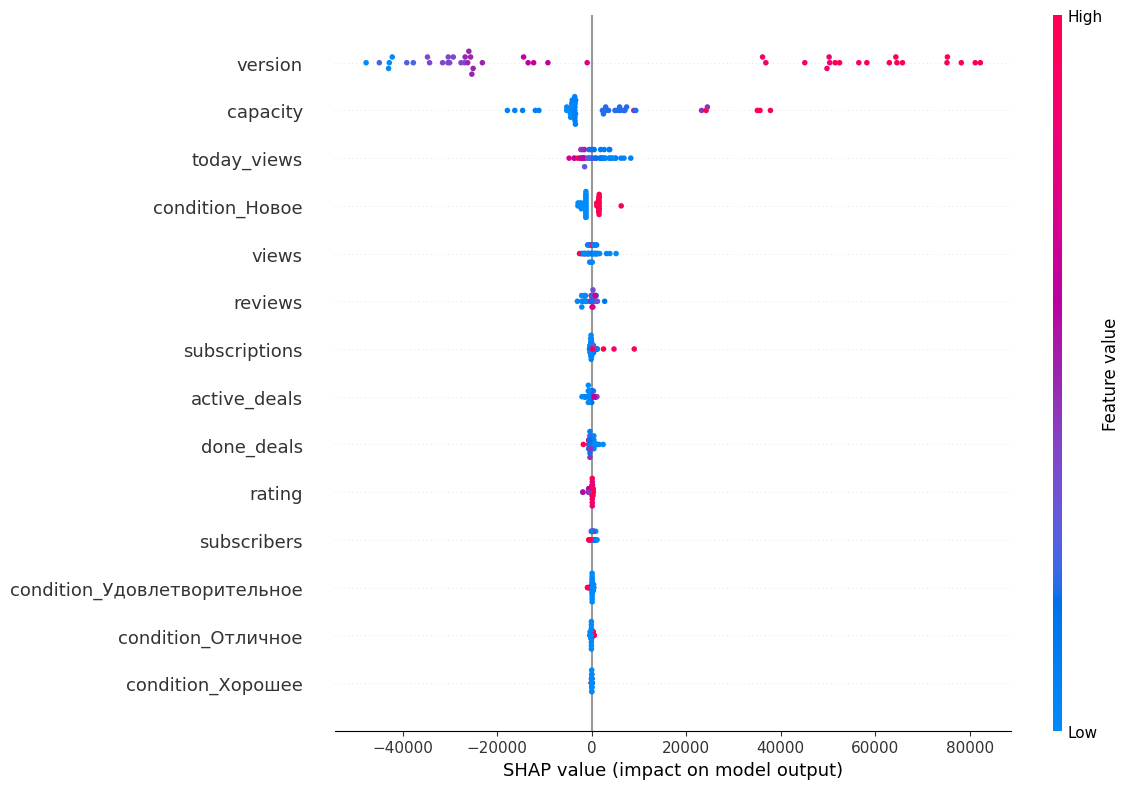

In [85]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

num_features = num_columns.tolist()
cat_feature_names = transformer.named_transformers_['cat'].get_feature_names_out(cat_features).tolist()

feature_names = num_features + cat_feature_names
shap_values.feature_names = feature_names
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_size=(12, 8))

array([[<Axes: title={'center': 'views'}>,
        <Axes: title={'center': 'today_views'}>,
        <Axes: title={'center': 'version'}>,
        <Axes: title={'center': 'capacity'}>],
       [<Axes: title={'center': 'reviews'}>,
        <Axes: title={'center': 'subscriptions'}>,
        <Axes: title={'center': 'done_deals'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'subscribers'}>,
        <Axes: title={'center': 'active_deals'}>,
        <Axes: title={'center': 'condition_Новое'}>,
        <Axes: title={'center': 'condition_Отличное'}>],
       [<Axes: title={'center': 'condition_Удовлетворительное'}>,
        <Axes: title={'center': 'condition_Хорошее'}>, <Axes: >,
        <Axes: >]], dtype=object)

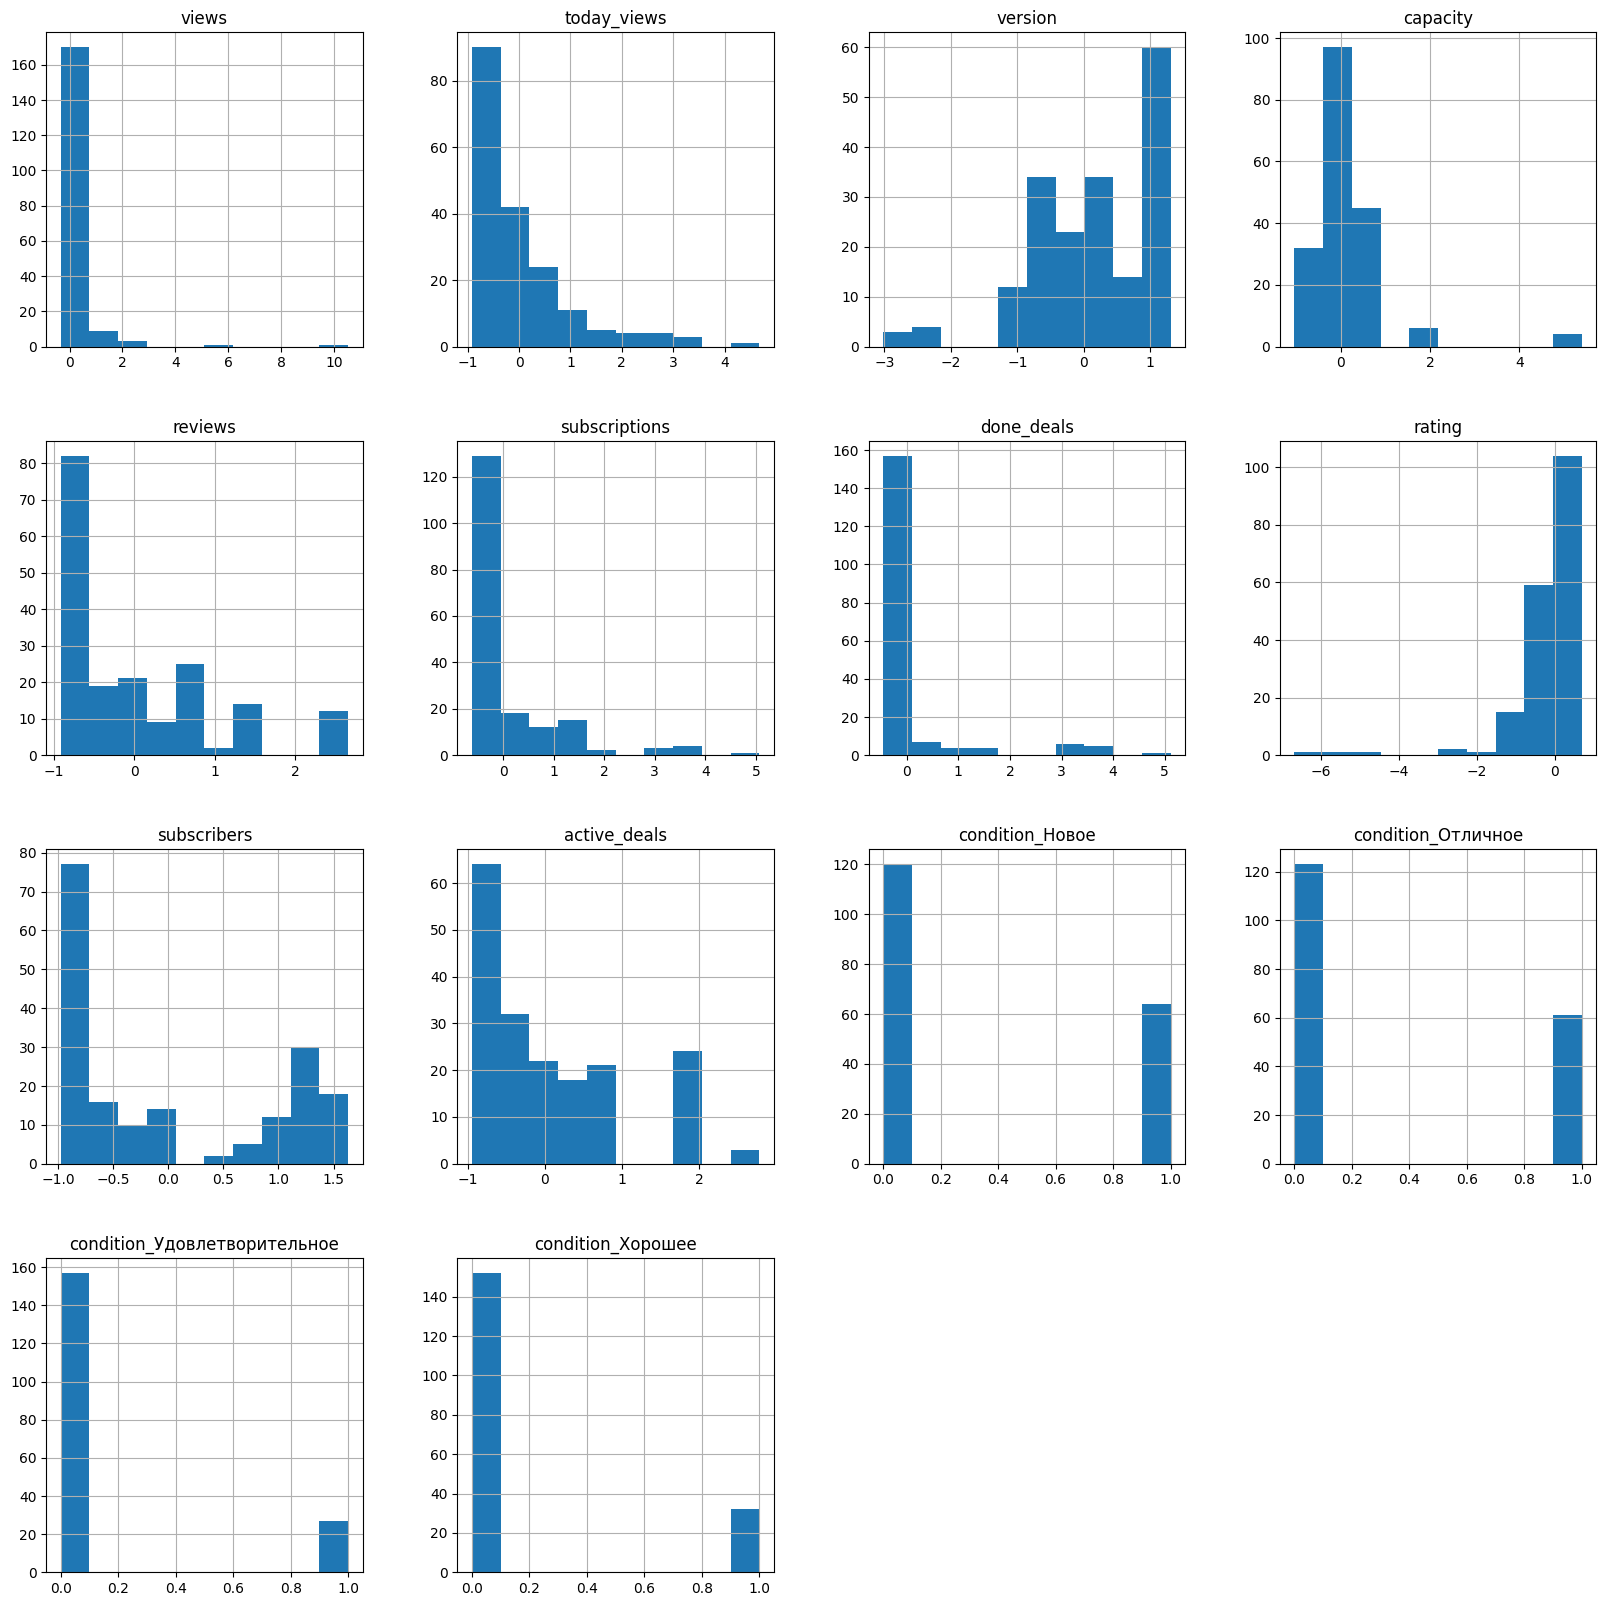

In [ ]:
# Convert X_train back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=num_columns.tolist() + transformer.named_transformers_['cat'].get_feature_names_out(cat_features).tolist())
X_train_df.hist(figsize=(20, 20))

<Axes: >

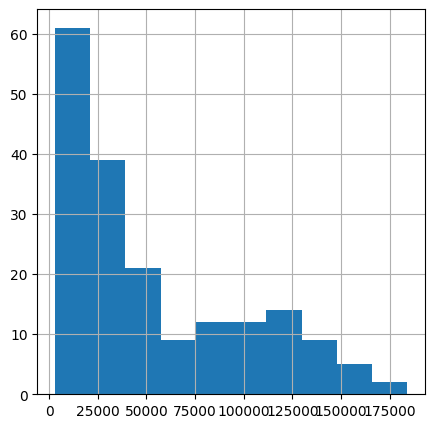

In [92]:
y_train.hist(figsize=(5, 5))